<a href="https://colab.research.google.com/github/GesielRodrigues/Curso_PMF/blob/main/PMF_M%C3%B3dulo_04_Estat%C3%ADstica_no_Mercado_Financeiro_Distribui%C3%A7%C3%A3o_Normal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src = "https://github.com/Trading-com-Dados/pmf/blob/main/logotipo-trading-com-dados.svg?raw=true" width = "200">

<center><img src = "https://github.com/Trading-com-Dados/pmf/blob/main/PMF%20002.png?raw=true" width = "700">

---
# **Estatística no Mercado Financeiro**
---

# **1. Introdução**

*Por que utilizar estatística?*

<img src="https://img.ifunny.co/images/d2e5651b80064003b248c3175ac092d94dd8dafe6b6375e441e1543c1e90ad7e_1.webp" width="500" align="left"/>

Apenas olhando o gráfico abaixo conseguiríamos dizer se existe alguma relação entre os dados?

**Provavelmente não.**

In [30]:
import numpy as np
from scipy import stats
import plotly.express as px

np.random.seed(15)
a = np.random.randint(50, size = 30)
b = np.random.randint(50, size = 30)
ab = zip(a,b)
fig = px.scatter(ab, x=a, y=b, template='simple_white', width=400, height=400)
fig.update_layout(paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20))

**Considerando a complexidade do universo de dados do mercado financeiro...**

Utilizamos estatística para, dentre outras coisas:

* Padronizar as interpretações

* Magnitude do relação/efeito

* Probabilidade de que o padrão se repita

In [2]:
corr, p = stats.pearsonr(a, b)
print(f'Correlação de Pearson, r={corr:.3f} p={p:.3f}')

Correlação de Pearson, r=0.296 p=0.112


## **1. Bibliotecas**

In [3]:
!pip install yfinance
!pip install vectorbt
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.6/34.6 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.6 MB/s eta 0:00:00
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.41.1
    Uninstalling llvmlite-0.41.1:
      Successfully uninstalled llvmlite-0.41.1
  Attempting uninstall: numba
    Found existing installation: numba 0.58.1
    Uninstalling numba-0.58.1:
      Successfully uninstalled numba-0.58.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 76.1 MB/s eta 0:00:00


In [5]:
import numpy as np
import pandas as pd

from scipy import stats
import pylab
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import yfinance as yf
import vectorbt as vbt

import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import sweetviz as sv

# **2. Análises exploratórias de dados: EDA**
## *Estatística descritiva*

O primeiro passo ao se analisar qualquer conjunto de dados, é entender como eles estão distribuídos.

Não é à toa que a primeira visualização que fizemos neste módulo foi um **scatter plot** (gráfico de dispersão)

> "**Analyses** <s>Men</s> of few words are the best <s>men</s> **analyses**"

> *Shakespeare*

## **2.1. Distribuição dos dados:**

### *Medidas de posição e dispersão*

Distribuição dos dados é o ponto chave para praticamente tudo o que entendemos por estatística

Apesar disso, muitas vezes é simplesmente ignorada nos modelos. Muitas vezes, modelos podem não funcionar por causa de algumas poucas observações que distorcem a distribuição dos dados.

### **2.1.1. Distribuição normal**

#### **Entendendo o comportamento**

Medidas paramétricas (média, desvios, intervalos de confiança, coeficiente de variação) funcionam bem

A distribuição normal (também chamada de Gaussiana), possui esse formato de 'sino'

Diversos fenômenos observados no mundo real possuem distribuição normal.

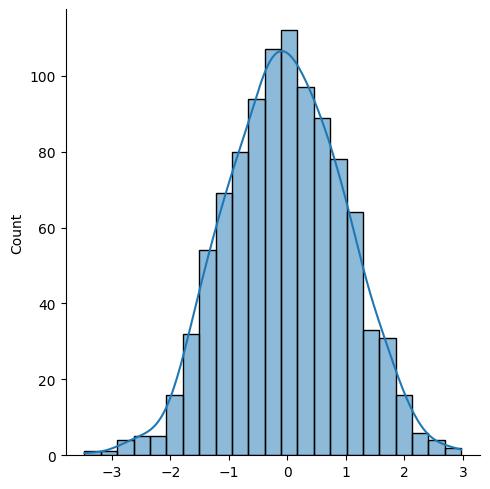

In [34]:
# Setando seed
np.random.seed(15)
# Gerando uma distribuição aproximadamente normal com mil observações
normal_dist = np.random.normal(0, 1, 1000)

# Plotando o gráfico de distribuição
normal_fig01 = sns.displot(normal_dist, kde=True)

Uma das propriedades mais importantes da distribuição normal é que a **média, mediana e moda serão iguais**.

É difícil verificar uma distribuição que seja **exatamente** normal, portanto estes valores serão **próximos**.

#### **Medidas de posição: média, mediana e moda**

**Média:**

A média é a média aritmética de um conjunto de números.

**Mediana:**

A mediana é um valor numérico que separa a metade superior de um conjunto da metade inferior.

**Moda:**

Valor que acontece com mais frequência.

In [35]:
print(np.mean(normal_dist))
print(np.median(normal_dist))
print(stats.mode(normal_dist)[0])

-0.03061202169860711
-0.0370596172171376
-3.466259721157739


In [36]:
# Valores arredondados
print(round(np.mean(normal_dist), 3))
print(round(np.median(normal_dist), 3))
print(round(stats.mode(normal_dist)[0], 3))

-0.031
-0.037
-3.466


Vamos visualizar na plotly para gerar um gráfico dinâmico

In [37]:
fig01 = px.histogram(normal_dist, color_discrete_sequence=['lightseagreen'])
fig01.add_vline(x=np.mean(normal_dist), line_width=3,  line_color="red")
fig01.add_vline(x=np.median(normal_dist), line_width=3, line_dash="dash", line_color="red")
fig01.update_layout(width=400, height=400, template = 'simple_white',
                    paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20),
                    showlegend=False)

**Como saber se uma distribuição é normal?**

Para isso, estudaremos os métodos a seguir.

#### **Testes de normalidade**

In [ ]:
teste_normalidade = stats.normaltest(normal_dist)
print(teste_normalidade)

NormaltestResult(statistic=1.2987341250431184, pvalue=0.5223763036889957)


À medida que aumenta o uso de **grandes volumes de dados**, **os testes de normalidade vão caindo em desuso**, pois eles são sensíveis justamente à quantidade de dados.

Para uma verificação da queda da normalidade com o volume de dados, vejamos este breve teste:

In [49]:
# Vamos testar a normalidade de um conjunto de dados aleatórios
# Veja que temos um conjunto de dados normal (p> 0.05)
import random

random.seed(1)
qtd_dados = 30
lista_numeros = [random.randrange(1, 50, 1) for i in range(qtd_dados)]
shapiro_test = stats.shapiro(lista_numeros)
print("Lista com",len(lista_numeros),'dados')
shapiro_test

Lista com 30 dados


ShapiroResult(statistic=0.9379926919937134, pvalue=0.08032047003507614)

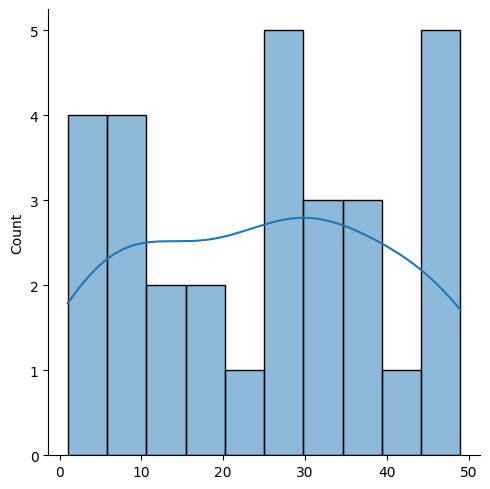

In [53]:
sns.displot(lista_numeros, kde=True, bins=10)

In [54]:
# Observa a média

print(np.mean(lista_numeros))

25.066666666666666


In [55]:
# Vamos dobrar o número de dados, mas repetindo a mesma lista, ou seja, normalidade deveria ser a mesma

lista_numeros.extend(lista_numeros)
shapiro_test = stats.shapiro(lista_numeros)
print("Lista com",len(lista_numeros),'dados')
shapiro_test

Lista com 60 dados


ShapiroResult(statistic=0.9343811273574829, pvalue=0.003061881521716714)

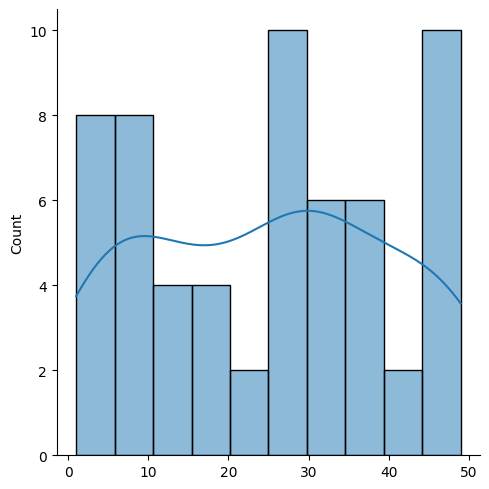

In [57]:
sns.displot(lista_numeros, kde=True, bins=10)

In [58]:
# Media se mantém já que só repetimos os numeros

print(np.mean(lista_numeros))

25.066666666666666


A **normalidade** no teste de normalidade caiu quando aumentamos o volume dos dados (mesmo os dados sendo iguais)

####**Medidas de posição: quantis**

Quantis são pontos de corte que dividem um intervalo de distribuição de probabilidade em intervalos contínuos com probabilidades iguais, ou as observações de uma amostra do mesmo jeito.

<img src="https://cdn.scribbr.com/wp-content/uploads/2022/05/Quartiles-probability-distribution.webp" width="500" align="left"/>

#### **Quantile-Quantile Plot (Q-Q plot)**

A função `stats.probplot` do módulo scipy é usada para criar um gráfico de probabilidade (Q-Q plot) para a**valiar se uma amostra de dados segue ou não uma distribuição teórica específica**.

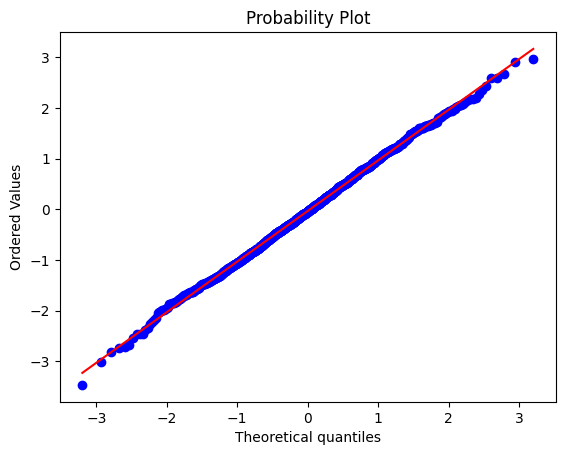

In [59]:
stats.probplot(normal_dist, dist="norm", plot=pylab)
pylab.show()

#### **Boxplots**

In [60]:
fig02 = go.Figure()
fig02.add_trace(go.Box(y=normal_dist, boxpoints='all', boxmean='sd', name='<b>Normal distribution', marker_color = 'blue'))
fig02.update_layout(width=400, height=400, template = 'simple_white',
                    paper_bgcolor="#f7f8fa", margin=dict(l=20, r=20, t=20, b=20),
                    showlegend=False)

In [61]:
# Quantil 0.25
print(np.quantile(normal_dist, 0.25))

# Percentil 25
print(np.percentile(normal_dist, 25))

-0.7300550279735354
-0.7300550279735354


In [62]:
# Transformando em um dataframe do pandas
df_normal_distrib = pd.DataFrame(normal_dist)
# Imprimindo dados descritivos do dataframe
df_normal_distrib.describe()

,0
count,1000.000000
mean,-0.030612
std,0.998161
min,-3.466260
25%,-0.730055
50%,-0.037060
75%,0.673736
max,2.968652


#### **Assimetria (skewness)**

A assimetria, também conhecida como *skewness* em inglês, é uma medida estatística que descreve a inclinação ou assimetria da distribuição de um conjunto de dados.

Indica a falta de simetria em uma distribuição, ou seja, se os dados estão concentrados mais à esquerda ou à direita em relação à média.

Existem três tipos de assimetria:

*   **Assimetria Negativa (à esquerda)**: A cauda esquerda da distribuição é mais longa ou "pesada" do que a cauda direita. A maioria dos dados está concentrada à direita da média, e há valores extremos à esquerda.

*   **Assimetria Zero (simetria)**: A distribuição é simétrica, o que significa que as caudas esquerda e direita são simétricas em relação à média.

*   **Assimetria Positiva (à direita)**: A cauda direita da distribuição é mais
longa ou "pesada" do que a cauda esquerda. A maioria dos dados está concentrada à esquerda da média, e há valores extremos à direita.


<img src="https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png" width="800" align="left"/>

A função `stats.skew` no módulo scipy é utilizada para calcular a medida de assimetria (*skewness*) de uma distribuição.

Essa medida indica o grau de assimetria na forma da distribuição de dados em relação à média.

In [ ]:
stats.skew(normal_dist)

0.013535659786954618

A interpretação do resultado é a seguinte:

*   Valor positivo indica assimetria positiva (a cauda direita é mais longa).
*   Valor negativo indica assimetria negativa (a cauda esquerda é mais longa).
*   Valor próximo de zero indica simetria.

#### **Medidas de dispersão (amplitude, desvios padrão e médio, coeficiente de variação e intervalo de confiança)**

**Amplitude**

Medida de dispersão que indica a extensão total dos valores em um conjunto de dados. É calculada subtraindo o menor valor do conjunto (mínimo) do maior valor (máximo).

Em termos simples, a amplitude representa a diferença entre o valor mais alto e o valor mais baixo em um conjunto de dados.

Fornece uma visão geral da variação total nos dados. No entanto, ela é sensível a valores extremos (outliers), pois é influenciada diretamente pelo máximo e mínimo.

Pode ser utilizada para definir alvos/stops.

In [63]:
amplitude = normal_dist.max() - normal_dist.min()
amplitude

6.434911794591442

**Desvio padrão**

O desvio padrão é uma medida que indica a dispersão dos dados dentro de uma amostra com relação à média. Assim, quando se calcula o desvio padrão juntamente com a média de diferentes grupos, obtém-se mais informações para avaliar e diferenciar seus comportamentos.

Pode ser utilizada em cálculos do Sharpe ratio e/ou bandas de bollinger.

In [64]:
# Desvio padrão da amostra (população degrees of freedom = False)
desvio_padrao = np.std(normal_dist, ddof = True)
desvio_padrao

0.9981608800763283

**Coeficiente de variação**

Medida estatística que expressa a variabilidade relativa de um conjunto de dados em relação à sua média.

É útil para **comparar a dispersão de conjuntos de dados que têm unidades de medida diferentes ou escalas distintas**.

Interessante para comparações e avaliar a consistência (ex., pagamento de dividendos)

In [ ]:
normal_dist.std(ddof = True)/normal_dist.mean()*100

57399.99104184921

**Erro padrão da média**


In [68]:
stats.sem(normal_dist)

0.03156461852319382

**Intervalo de confiança 95%**

In [69]:
IC_95 = stats.t.interval(confidence=0.95, df=len(normal_dist)-1, loc=np.mean(normal_dist), scale=stats.sem(normal_dist))
IC_95

(-0.09255258133153119, 0.03132853793431696)

#### **Curtose (kurtosis)**

A curtose é uma medida estatística que descreve a forma da distribuição de um conjunto de dados, especificamente, a forma das caudas da distribuição em relação ao pico. Ela quantifica o grau de "achatamento" ou "afilamento" das caudas de uma distribuição em comparação com a distribuição normal.

A curtose é usada para avaliar a forma da distribuição de dados e entender a presença de caudas extremas.

Em finanças, a curtose pode ser útil para avaliar a extensão de eventos extremos nos retornos de investimentos.

<img src="https://www.researchgate.net/profile/Attila-Bonyar/publication/298415862/figure/fig1/AS:340236723867648@1458130164255/Illustration-of-the-skewness-and-kurtosis-values-and-how-they-correlate-with-the-shape-of_W640.jpg" width="600" align="left"/>

In [70]:
stats.kurtosis(normal_dist, fisher=True)

-0.14828077807731121